# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

## Objetivos

Después de completar este lab seras capas de:

*   Explorar en profundidad la librería Matplotlib
*   Crear pie charts, box plots, scatter plots y bubble charts

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Explorar Datasets con *p*andas](#0)<br>
2.  [Descargar y preparar información](#2)<br>
3.  [Visualizar información usando Matplotlib](#4) <br>
4.  [Pie Charts](#6) <br>
5.  [Box Plots](#8) <br>
6.  [Scatter Plots](#10) <br>
7.  [Bubble Plots](#12) <br>

</div>


# Explorando Datasets con *pandas* y Matplotlib<a id="0"></a>

Herramientas: El curso depende fuertemente de [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) y [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) para arreglo de la información, análisis y visualización. la principal librería para gráficar que exploraremos en este curso sera [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Dataset: Inmigración a Canada desde 1980 hasta 2013 - [Flujo de inmigración internacional desde y hasta países elegidos - revision del 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) de la pagina de las Naciones unidas.

El dataset contiene información anual del flujo internacional de migrantes registrado por los países de destino. La información presenta ambos flujos entradas y salidas de acuerdo al lugar del nacimiento, ciudadanía o lugar previo/ siguiente lugar de residencia tanto como para extranjeros como nacionales. En este lab, nos enfocaremos en la información de Inmigración de Canada.

# Descargando y preparando la información <a id="2"></a>


Lo primero que debemos hacer es instalar **openpyxl** (anteriormente **xlrd**), un modulo que *pandas* requiere para leer archivos Excel.

In [2]:
# pip install openpyxl

Importamos los módulos principales

In [3]:
import numpy as np
import pandas as pd

Descargar el dataset de la inmigración de Canada y pasarlo a un dataframe de *pandas*

In [4]:
import urllib.request
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = urllib.request.urlopen(URL)

if resp.getcode()==200:
    content = resp.read()
    df_can = pd.read_excel(io.BytesIO(content),
                           sheet_name="Canada by Citizenship",
                           skiprows=range(20),
                           skipfooter=2)
    print("Data downloaded and read into a dataframe!")
else:
    print("Error al descargar el archivo")

Data downloaded and read into a dataframe!


Veamos los primeros 5 elementos en nuestro dataset.

In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Veamos cuantas entradas tiene nuestro Dataset.

In [6]:
# usaremos print para ver las dimensiones de nuestro Dataset.
print(df_can.shape)

(195, 43)


Limpiar la información. Haremos algunas modificaciones al dataset original para que sea mas fácil crear nuestras visualizaciones. Referencia a *Introduction to Matplotlib and Line Plots* y *Area Plots, Histograms, y Bar Plots* para una descripción detallada del proceso.

In [7]:
# Limpiar el dataset para remover las columnas innecesarias(ej. REG)
df_can.drop(["AREA","REG","DEV","Type","Coverage"],axis=1, inplace=True)

# Renombraremos las columnas para que tengan sentido.
df_can.rename(columns={"OdName":"Country","AreaName":"Continent","RegName":"Region"}, inplace=True)

# Por el bien de la consistencia, haremos que todos los rótulos de las columnas sean de tipo string
df_can.columns= list(map(str,df_can.columns))

# Fijaremos el nombre de los países como index.
df_can.set_index("Country",inplace=True)

# Agregamos la columna Total
df_can["Total"]= df_can.iloc[:,4:].sum(axis=1)

# Crearemos una lista llamada years que nos servirá a través de los ejemplos y ejercicios del lab.
years = list(map(str,range(1980,2014)))
print("Data dimension:", df_can.shape)

Data dimension: (195, 38)


# Visualización de información usando Matplotlib<a id="4"></a>


In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("ggplot") # Opcional: para ggplot-like style

# Verificar la ultima version de matplotlib
print("Version de Matplotlib: ", mpl.__version__)

Version de Matplotlib:  3.7.2


# Pie Charts <a id="6"></a>

Un `pie chart` es un gráfico circular que muestra proporciones numeras al dividir un circulo (o pie) en pedazos o tajadas proporcionales. Tu ya puedes estar mas o menos familiarizado con los gráficos de pieya que son usados en negocios y media. Podemos crear gráficos de pie en Matplotlib al pasar en la palabra clave`kind=pie`.

Usaremos un gráfico de pie para explorar las proporciones(porcentajes) de nuevos inmigrantes por continentes por el periodo completo de 1980 a 2013.

Paso 1: Reunir información.

Usaremos el método *pandas* `groupby`para resumir la información de los inmigrantes por `Continent`. El proceso general de `groupby` envuelve los siguientes pasos:

1.  **Split:** Dividir la información en grupos basados en algún criterio.
2.  **Apply:** Aplicar una función a cada grupo independientemente:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combinar los resultas en una estructura de datos.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">

In [9]:
# Agrupar países por continente y aplicar la función sum().
df_continents= df_can.groupby("Continent",axis=0).sum()

# Nota: el resultado del método groupby es un objeto groupby.
# No podremos usar mas a menos que apliquemos una función (e.j .sum())

print(type(df_can.groupby("Continent",axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,614997
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3286769
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1371187
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,752067
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,231764


Paso 2: Gráficar la información. Pasaremos la palabra clave (keyword) en `kind = 'pie'`, seguido de los siguientes parámetros:

*   `autopct` -  es un string o función usada para rotular las cuñas con su valor numérico. El rotulo debe ser puesto dentro de la cuña. Si el formato es un string, el rotulo sera `fmt%pct`.
*   `startangle` - Rota el comienzo del gráfico de pie en grados en contra del sentido del reloj desde el `eje-x`.
*   `shadow` - Dibuja una sombra bajo el pie (para darle una sensación 3D).

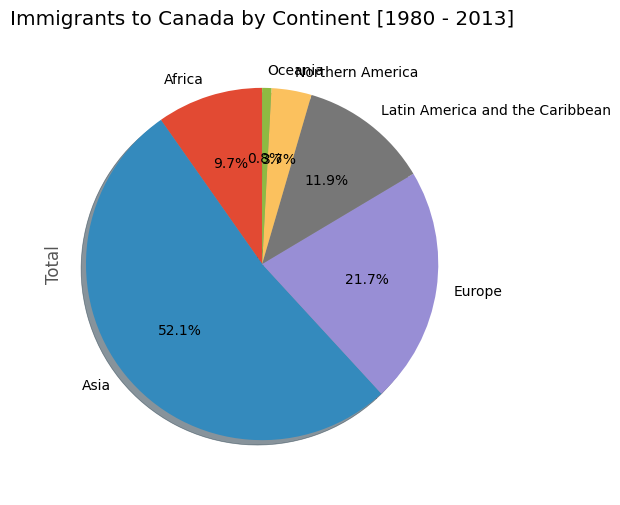

In [10]:
# autopct crea %, start angle representa el punto de inicio.
df_continents["Total"].plot(kind="pie",
                            figsize=(5,6),
                            autopct = "%1.1f%%", # Agrega los porcentajes
                            startangle = 90, # Angulo de inicio 90º (Africa)
                            shadow = True, # Agrega sombra
                            )

plt.title("Immigrants to Canada by Continent [1980 - 2013]")
plt.axis("equal")

plt.show()

La visual de arriba no esta clara, los números y textos se sobreponen en algunos sectores. Hagamos algunas modificaciones para mejorar la visual:

*   Remover los rótulos de gráfico de pie al pasar `legend` y agregar lo por separado usando legend en `plt.legend()`.
*   Mueve hacia afuera los porcentajes para que este justo afuera del gráfico de pie al pasar el parámetro `pctdistance`.
*   Pase un conjunto de colores personalizados para cada continente al pasar el parámetro `colors`.
*   **Destaca** el gráfico de pie para enfatizar los tres continentes mas bajos (Africa, North America, and Latin America and Caribbean) al pasar el parámetro `explode`.

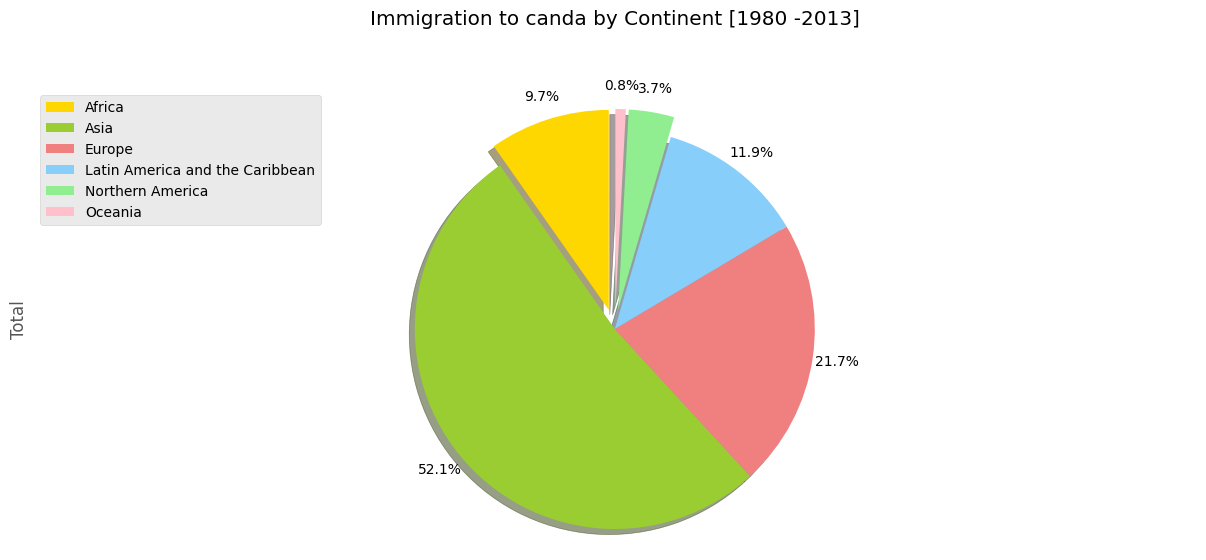

In [11]:
color_list = ["gold","yellowgreen","lightcoral","lightskyblue","lightgreen","pink"]
explode_list=[0.1,0,0,0,0.1,0.1]

df_continents["Total"].plot(kind="pie",
                            figsize=(15,6),
                            autopct = "%1.1f%%",
                            startangle =90,
                            shadow = True,
                            labels = None,
                            pctdistance = 1.12,
                            colors = color_list,
                            explode = explode_list
                            )

plt.title("Immigration to canda by Continent [1980 -2013]", y= 1.12)

plt.axis("equal")

plt.legend(labels=df_continents.index, loc="upper left")

plt.show()

**Pregunta:** Usando un gráfico de pie, explora las proporciones (porcentaje) de nuevos inmigrantes agrupados por continentes en 2013.

**Nota**: Puedes tener que jugar con los valores de explore para poder arreglar los valores sobrepuestos en las tajadas.

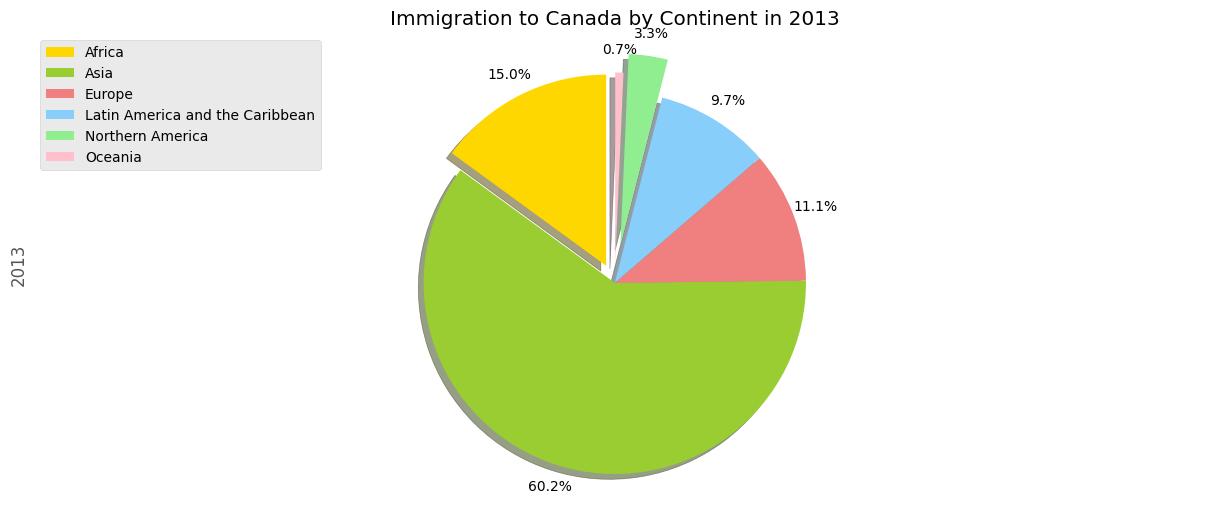

In [12]:
explode_list=[0.1,0,0,0,0.2,0.1]
df_continents["2013"].plot(kind="pie",
                           figsize=(15,6),
                           autopct="%1.1f%%",
                           startangle = 90,
                           shadow = True,
                           labels = None,
                           pctdistance = 1.12,
                           colors = color_list,
                           explode = explode_list                           
                           )

plt.title("Immigration to Canada by Continent in 2013")
plt.axis("equal")

plt.legend(labels=df_continents.index,loc="upper left")

plt.show()

# Box Plots <a id="8"></a>

Un `box plot` es una manera de representar estadisticamente lae *distribución* de la información a traves de cinco dimensiones principales:

*   **Minimum:** El numero mas pequeño en el dataset excluyendo los valores atípicos.
*   **First quartile:** Número que se encuentra en medio del valor `minimum` y el `median`.
*   **Second quartile (Median):** Número medio del data set (ordenado).
*   **Third quartile:** Numero medio entre `median` y `maximum`.
*   **Maximum:** El numero mas grande del dataset excluyendo los valores atípicos.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">


Para hacer un `boxplot`, debemos usar `kind=box` en el método `plot` invoca una serie o dataframe de*pandas*.

Vamos a hacer un box plot para los inmigrantes japoneses entre los años 1980 - 2013.

Paso 1: Obtener el subset del dataset. Incluso si estamos extrayendo la información para un solo país, lo obtendremos como si fuera un dataframe. esto nos ayudara a llamar el método `dataframe.describe()`y ver lo en percentiles.

In [13]:
# Para obtener un dataframe, coloca brackets cuadrados extras.

df_japan = df_can.loc[["Japan"],years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Paso 2: Gráficar al pasar `kind="box"`.

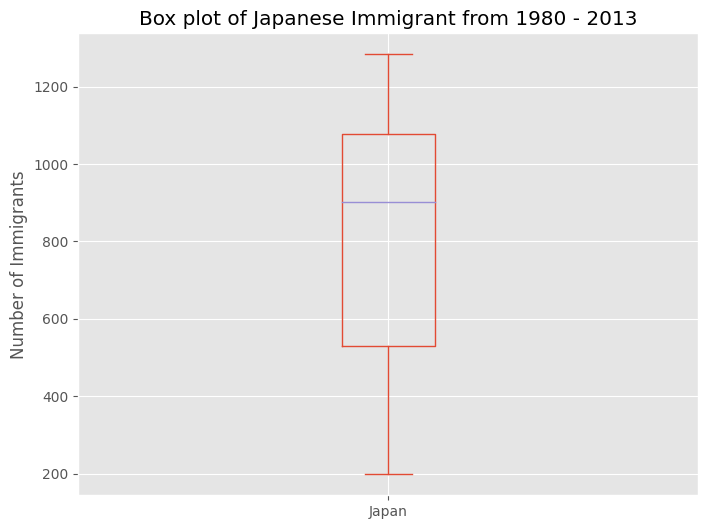

In [14]:
df_japan.plot(kind="box",figsize=(8,6))

plt.title("Box plot of Japanese Immigrant from 1980 - 2013")
plt.ylabel("Number of Immigrants")

plt.show()

Inmediatamente podemos hacer algunas observaciones del gráfico de arriba:

1.  El numero mínimo esta al rededor de 200 200 (min), el numero máximo esta al rededor del 1300 (max), y el numero medio esta al rededor del 900 (median).
2.  25% de los años para el periodo 1980 - 2013 tienen un conteo anual de inmigrantes de \~500 o menos (Primer quartile).
3.  75% de los años para el periodo 1980 - 2013 tiene un conteo anual de inmigrantes de \~1100 o menos (Tercer quartile).

Podemos ver los números actuales al llamar el método `describe()` en el dataframe.

In [15]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Uno de los factores claves en el beneficio de los box plots es comparar la distribución de multiples datasets. En uno de los labs previos, observamos que China y India tienen tendencias similares. Vamos a analizar estos dos países en profundidad usando box plots.

**Pregunta:** Compara la distribución del numero de inmigrantes para India y China para el periodo de 1980 - 2013.

Paso 1: Obtener el dataset para China e India y llama al dataframe **df_CI**.

In [16]:
df_CI = df_can.loc[["China","India"], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Veamos los percentiles asociados con ambos países usando el método `describe()`.


In [17]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Paso 2: Gráficar la información.

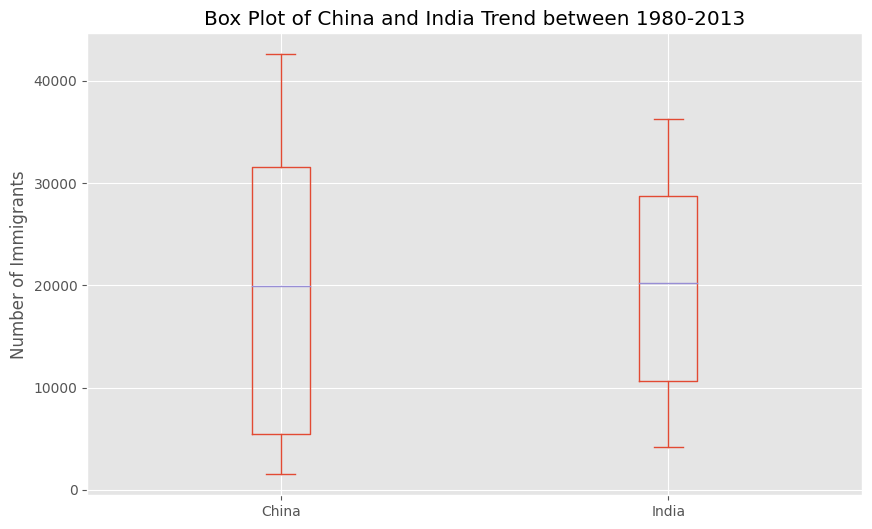

In [18]:
df_CI.plot(kind="box",figsize=(10,6))

plt.title("Box Plot of China and India Trend between 1980-2013")
plt.ylabel("Number of Immigrants")

plt.show()

Podemos observar que, mientras ambos países tiene al rededor de la misma media de población inmigrante (\~20,000), La población inmigrante China tiene un rango mas disperso que la India. La población maxima de India para cualquier año (36,210) es al rededor de un 15% mas bajo que el máximo de población de China (42,584).

Si prefieres crear un box plot horizontal, puedes pasar el parámetro `vert` en la función **plot** y asignarlo a *False*. También puedes especificar un color diferente en caso de que no seas fanático del color rojo por defecto.

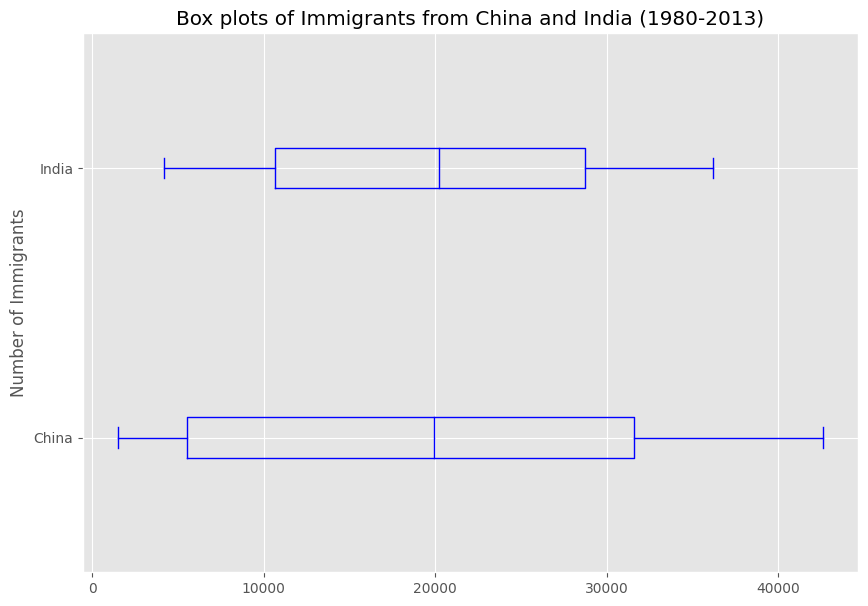

In [19]:
# Box plot Horizontal.

df_CI.plot(kind="box", figsize=(10,7), color="blue", vert=False)

plt.title("Box plots of Immigrants from China and India (1980-2013)")
plt.ylabel("Number of Immigrants")

plt.show()

**Subplots**

Algunas veces querremos gráficar multiples gráficos en la misma figura. Por ejemplo, podremos querer realizar una comparación lado a lado  de los box plot con el line plot de la Inmigración de China y India.

Para visualizar multiples gráficos juntos, podemos crear una **`figura`** (overall canvas) y dividirlo en **`subplots`**, cada uno conteniendo un gráfico. Con **subplots**, normalmente trabajamos con el **artist layer** en vez de el **scripting layer**.

La syntax típica es: <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Donde

*   `nrows` y `ncols` son usadas para dividir la figura conceptualmente en los sub ejes (`nrows` \* `ncols`).
*   `plot_number` se utiliza para identificar el subplot específico que esta función creará dentro de la cuadrícula conceptual. `plot_number` comienza en 1, se incrementa a lo largo de las filas primero y tiene un máximo de `nrows` \* `ncols`, como se muestra a continuación.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">

Podemos especificar que subplot poner en cada gráfica al pasar en el parámetro `ax`en el método `plot()` de la siguiente manera:

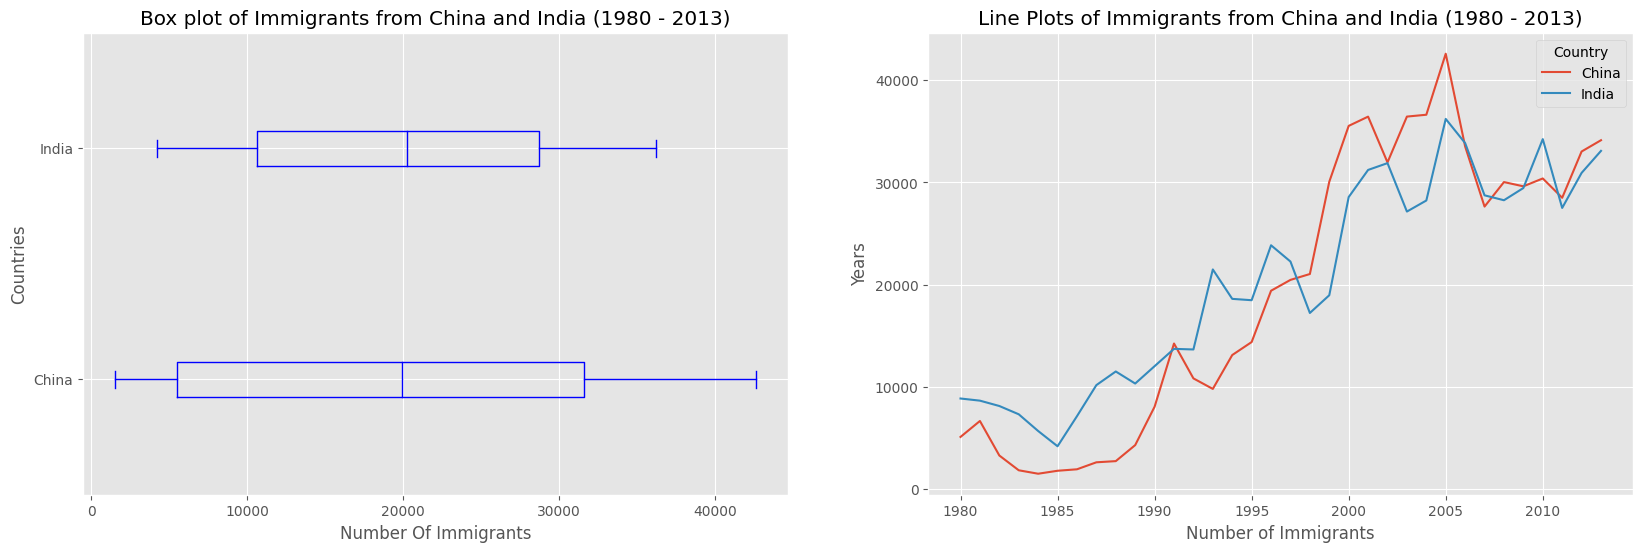

In [20]:
fig = plt.figure() # Creamos la figura

ax0 = fig.add_subplot(1,2,1) # Agregamos el subplot 1 (1 fila, 2 columnas, primer plot)
ax1 = fig.add_subplot(1,2,2) # Agregamos el subplot 2 (1 fila, 2 columnas, segundo plot). ve los tips abajo**

# Subplot 1: Box plot
df_CI.plot(kind="box", color="blue", vert=False, figsize=(20,6), ax=ax0) # Agregamos al subplot 1
ax0.set_title("Box plot of Immigrants from China and India (1980 - 2013)")
ax0.set_xlabel("Number Of Immigrants")
ax0.set_ylabel("Countries")


# Subplot 2: Line plot.
df_CI.plot(kind="line", figsize=(20,6),ax=ax1) # Agregamos el subplot 2
ax1.set_title("Line Plots of Immigrants from China and India (1980 - 2013)")
ax1.set_xlabel("Number of Immigrants")
ax1.set_ylabel("Years")

plt.show()


**Tip independiente de la convención de subplot**

En el caso que `nrows`, `ncols`, y `plot_number` son todas menores a 10,Existe una conveniencia tal que se puede proporcionar un número de 3 dígitos en su lugar, donde las centenas representan `nrows`, las decenas representan `ncols` y las unidades representan `plot_number`. Por ejemplo,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produce un sub-ejes en una figura que representa la gráfica superior (e.j. el primero)En una cuadrícula conceptual de 2 filas y 1 columna (en realidad no existe una cuadrícula, pero conceptualmente es cómo se ha posicionado el subplot devuelto).


Tratemos de hacer algo mas avanzado.

Previamente identificamos el top 15 de los países basado en el total de la inmigración desde 1980-2013.

**Pregunta:** Crea un box plot para visualizar la distribución del top 15 de los países (basado en el total de la inmigración) agrupado por *`decadas`* `1980s`,`1990s`y `2000`.

Paso 1: Obtén un dataset. Obtén el top 15 países basado en el total de población migrante. Nombra el dataframe **df_top15**.

In [21]:
df_top15= df_can.sort_values(["Total"], ascending=False,axis=0).head(15)

df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,683024
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,654839
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,529455
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,505340
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,240622
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,231744
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,174751
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148173
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,141570


Paseo 2: Crea un nuevo dataframe que contengan los agregados por cada década. Para poder hacer eso:

1.  crea una lista de todos los años en décadas 80's, 90's, y 00's.
2.  Slice a traves del dataframe original df_can para crear una serie por cada década y suma a traves de cada año par cada país.
3.  Merge las tres series dentro de un nuevo dataframe. llama a tu dataframe **new_df**.

In [22]:
years_80s=list(map(str,range(1980,1989)))
years_90s=list(map(str,range(1990,1999)))
years_00s= list(map(str,range(2000,2009)))

df_80s= df_top15.loc[:,years_80s].sum(axis=1)
df_90s=df_top15.loc[:,years_90s].sum(axis=1)
df_00s=df_top15.loc[:,years_00s].sum(axis=1)

new_df = pd.DataFrame({"1980s":df_80s,"1990":df_90s,"2000":df_00s})

new_df.head()

,1980s,1990,2000
Country,,,
India,71811,161421,274135
China,27680,131459,310763
United Kingdom of Great Britain and Northern Ireland,155376,254921,74537
Philippines,48899,128748,144331
Pakistan,8330,55323,120381


Aprendamos mas acerca de las estadísticas asociadas con el dataframe usando el método `describe()`.

In [23]:
new_df.describe()

,1980s,1990,2000
count,15.000000,15.000000,15.000000
mean,37555.600000,78067.933333,87765.933333
std,38632.337084,64095.522153,90937.577912
min,6031.000000,26685.000000,12616.000000
25%,14042.500000,37139.000000,32037.500000
50%,27634.000000,51719.000000,59214.000000
75%,45238.000000,97093.500000,97459.000000
max,155376.000000,254921.000000,310763.000000


Paso 3: Dibujemos el box plots.

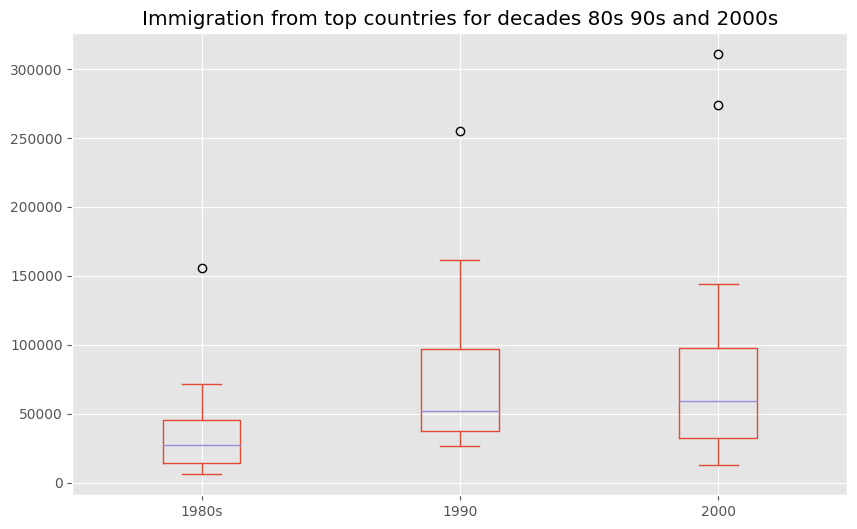

In [24]:
new_df.plot(kind="box",figsize=(10,6))

plt.title("Immigration from top countries for decades 80s 90s and 2000s")

plt.show()

Nota como el box plot difiere de la tabla sumario creada. El box plot escanea la información e identifica los registros irregulares. Para poder ser un registro irregular, el valor de la información debe ser:<br>

*   Mayor que Q3 por al menos 1.5 veces al rango interquartile (IQR), o,
*    Más pequeños que Q1 por al menos 1.5 veces el IQR.

Veamos la década del 2000s como un ejemplo: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Usando la definición de registro anormal, cualquier valor que es mayor a Q3 por 1.5 veces el IQR will sera marcado como un registro anormal.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5

In [25]:
new_df=new_df.reset_index()
new_df[new_df["2000"]>209611.5]

,Country,1980s,1990,2000
0,India,71811,161421,274135
1,China,27680,131459,310763


Tanto China como India son considerados como registros anormales dado que su población para la década los 209,611.5.

El box plot es una herramienta de visualización avanzada, y hay muchas opciones para personalizar que excede el alcance de este lab. Por favor dirígete a [Matplotlib documentation](http://matplotlib.org/api/pyplot_api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#matplotlib.pyplot.boxplot) en box plots para mas información.


# Scatter Plots <a id="10"></a>

Un `scatter plot` (2D) es un método util para comparar variables unas contra otras. `Scatter plots` se ven similares `line plots` en que ambos mapean variables de forma independiente y dependiente en un gráfico 2D. Mientras los puntos de información conectan por una linea en un line plot, estos no se encuentran conectados en un. La información en un scatter plot es considerada como la expresión de una tendencia. Con mayor análisis usando herramientas como regresión, podemos matemáticamente calcular esta relación y usarla para predecir la tendencia fuera del dataset.

Comencemos por explorar lo siguiente:

Usando un `scatter plot`, visualizaremos ela tendencia de la inmigración total a Canada (todos los países combinados) para los años 1980 - 2013.

In [26]:
# Podemos usar el método sum() para obtener la población total por año.
df_tot= pd.DataFrame(df_can[years].sum(axis=0))

# Cambia el año a tipo int (util para la regresión luego).
df_tot.index= map(int,df_tot.index)

# Restablece el índice para volver a colocarlo como una columna en el dataframe df_tot

df_tot.reset_index(inplace=True)

# renombra las columnas
df_tot.columns = ["year","total"]

# Ver el dataframe final.
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Paso 2: Gráfica la información. En `Matplotlib`, podemos crear un `scatter` plot set al pasar `kind='scatter'` como argumento de plot. Tambien necesitaremos pasar en `x` y `y` keywords para especificar las columnas que van en el eje- y en el eje-y.

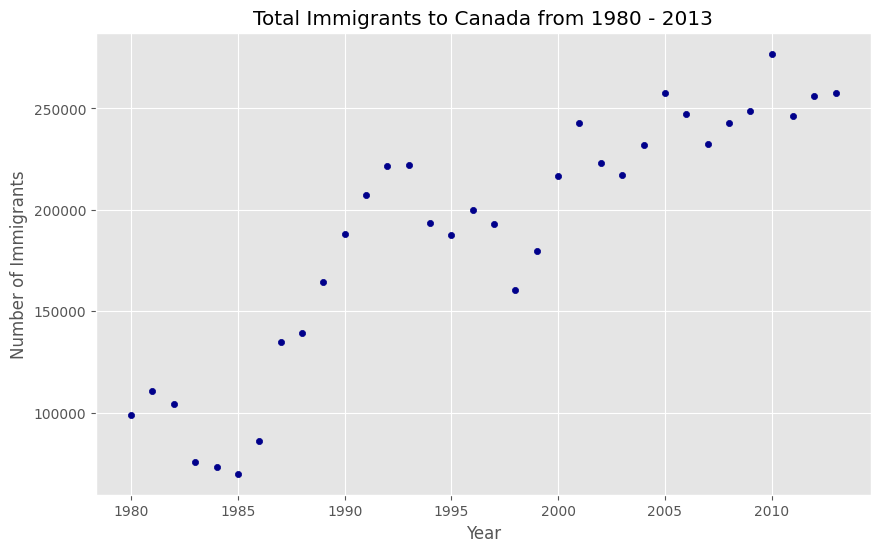

In [27]:
df_tot.plot(kind="scatter",x="year",y="total", figsize=(10,6),color="darkblue")

plt.title("Total Immigrants to Canada from 1980 - 2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.show()

Nota como el scatter no conecta. Podemos observar claramente una tendencia hacia arriba en la información: a medida que pasan los años, El número total de inmigrantes incrementa. Podemos analizar este flujo hacia arriba de forma matemática usando una regresión lineal (line of best fit).


Entonces intentemos trazar una línea de regresión lineal, y úsala para predecir el número de inmigrantes en 2015.

Paso 1: Obtén la ecuación de la regresión lineal. Usaremos **Numpy** el método `polyfit()` al pasar lo siguiente:

*   `x`: x-coordenadas de la información.
*   `y`: y-coordenadas de la información.
*   `deg`: Grado del polinomio de ajuste. 1 = lineal, 2 = cuadrática, y asi sucesivamente.

In [28]:
x = df_tot["year"]
y = df_tot["total"]
fit = np.polyfit(x,y,deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

La salida es un arreglo con los coeficientes del polinomio, comenzando por las potencias mas altas. dado que estas gráficando una regresión lineal `y= a * x + b`, nuestra salida tiene 2 elementos `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.

Paso 2: Gráfica una regresión lineal en el `scatter plot`.

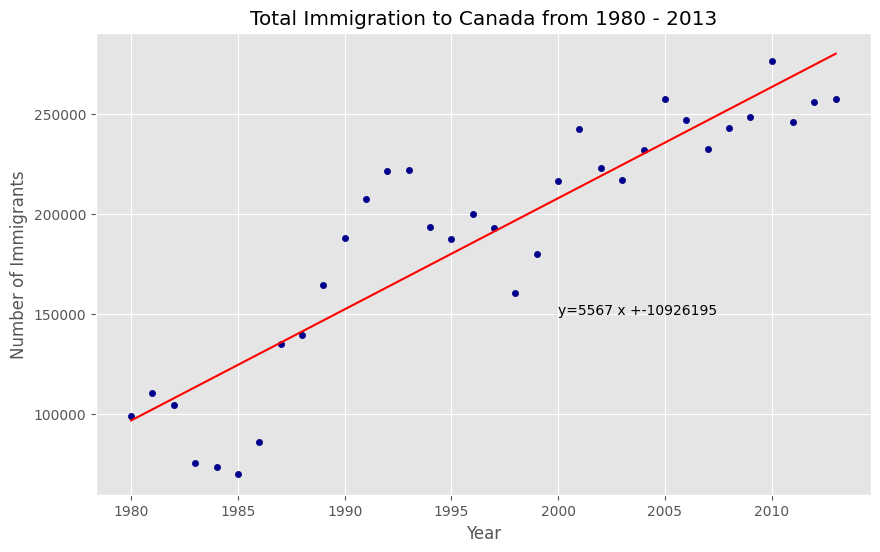

'No Immigrants = 5567 * Year + -10926195'

In [29]:
df_tot.plot(kind="scatter",x="year",y="total",figsize=(10,6),color="darkblue")

plt.title("Total Immigration to Canada from 1980 - 2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.plot(x,fit[0] * x+fit[1], color="red") # Recuerda que x es el año
plt.annotate("y={0:.0f} x +{1:.0f}".format(fit[0],fit[1]), xy=(2000, 150000))

plt.show()

# Imprime la line del mejor ajustado
"No Immigrants = {0:.0f} * Year + {1:.0f}".format(fit[0],fit[1])

Usando la ecuación de la linea del mejor ajuste, podemos estimar el numero de inmigrantes en 2015 :

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

Cuando comparamos con el actual Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), vemos que Canada aceptó 271,845 inmigrantes en 2015. Nuestro valor estimado de 291,310 esta dentro del 7% del número actual, lo cual es bastante bueno considerando que la información vino de las Naciones Unidas (y puede ser un poco diferente de la información de CIC).

Como nota aparte, podemos observar que la inmigración tuvo un descenso al rededor de 1993 - 1997. Un análisis mas profundo en el tema revelo que en 1990 Canada introdujo la Bill C-86 la cual introduce una revision al sistema de determinación de refugiados, mayormente restrictiva. Enmiendas futuras a la regulación de inmigración cancelaron el patrocinio requerido para "assisted relatives" y reduce los puntos ganados a ellos, haciendo mas difícil para miembros de la familia (otros que no corresponden al núcleo familiar) inmigrar a Canada. Estas medidas restrictivas tuvieron un impacto directo en los números de inmigración por varios años.

**Pregunta**: Crea un scatter plot del total de inmigración de Dinamarca,Noruega Y Suecia a Canada desde 1980 a 2013?


**Paso 1**: Obtener la información:

1.  Crea un dataframe que consiste en los números asociados a Dinamarca, Noruega y Suecia llama a este dataframe **`df_countries`**.
2.  Suma el número de migrantes de los tres países por cada año y vuelca el resultado a un dataframe. llama a al nuevo dataframe **df_total**.
3.  Restablece el indice en su lugar.
4.  Renombra las columnas a **year** y **total**.
5.  Muestra los resultados del dataframe.

In [40]:
df_countries = df_can.loc[["Denmark","Norway","Sweden"],years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.index = map(int,df_total.index)

df_total.reset_index(inplace=True)

df_total.columns = ["Year","Total"]

df_total['Year']=df_total["Year"].astype(int)

df_total.head()


,Year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


**Paso 2**: Genera un scatter plot gráficando el `total` versus `years` en **df_total**.

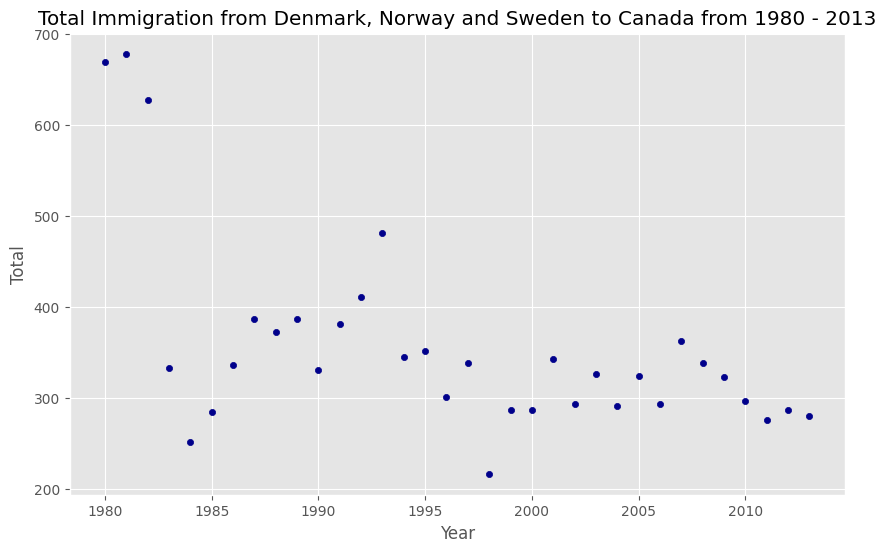

In [44]:
df_total.plot(kind="scatter",x="Year",y="Total",figsize=(10,6),color="darkblue")

plt.title("Total Immigration from Denmark, Norway and Sweden to Canada from 1980 - 2013")
plt.xlabel("Year")
plt.ylabel("Total")

plt.show()